# Lab 10 Classification and Predictive Analytics

This dataset is comprised of seed characteristics of three different kinds of wheatseeds: kama, rosa, and Canadian. We would like to build a classifier that is effective at classifying rosa seeds from non-rosa seeds for new data.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from scipy.stats import t
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### 1. [.5 pt] Read the seeds.csv into a dataframe called df.

In [2]:
df=pd.read_csv('seeds.csv')
df.head()

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length,seed_class
0,15.26,14.84,0.871,5.762,2.212,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,2.222,1.018,4.956,kama
2,14.29,14.09,0.905,5.291,2.227,2.699,4.825,kama
3,12.84,12.94,0.8955,5.224,2.279,2.259,4.805,kama
4,16.14,14.99,0.9024,5.658,2.562,1.255,5.175,kama


### 2. [.5 pt] How many rows are in this dataframe df?

In [3]:
df.shape

(210, 8)

In [4]:
print('number of rows: ', df.shape[0])

number of rows:  210


### 3. [0.5 pt] Display the number of seeds of each type of seed class.

In [5]:
df['seed_class'].value_counts()

rosa        70
canadian    70
kama        70
Name: seed_class, dtype: int64

### 4. [1 pt] Next, make a new variable in df called 'rosa' and define it to have 
* This 'rosa' column should say 'not_rosa' when the 'seed_class' column does not say 'rosa'.
* This 'rosa' column should say 'rosa' when the 'seed_class' column says 'rosa'.

(We've talked about three ways to do this in class, either is fine).

In [6]:
df['rosa']=df['seed_class']
df['rosa'][df['rosa']!='rosa']='not_rosa'
df

<ipython-input-6-3c2acd927554>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rosa'][df['rosa']!='rosa']='not_rosa'


,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length,seed_class,rosa
0,15.26,14.84,0.871,5.762,2.212,2.221,5.220,kama,not_rosa
1,14.88,14.57,0.8811,5.554,2.222,1.018,4.956,kama,not_rosa
2,14.29,14.09,0.905,5.291,2.227,2.699,4.825,kama,not_rosa
3,12.84,12.94,0.8955,5.224,2.279,2.259,4.805,kama,not_rosa
4,16.14,14.99,0.9024,5.658,2.562,1.255,5.175,kama,not_rosa
...,...,...,...,...,...,...,...,...,...
205,12.19,12.20,0.8782,5.127,2.981,2.621,4.870,canadian,not_rosa
206,11.22,12.88,0.8511,5.140,2.795,4.225,5.002,canadian,not_rosa
207,12.20,12.66,0.8882,5.226,2.222,8.215,5.056,canadian,not_rosa
208,11.84,12.21,0.8521,5.175,2.826,2.598,5.044,canadian,not_rosa


### 5. [1 pt] Next, create a new variable in df that is equal to 1, when the seed class is rosa and that is equal to 0 when the seed class is not-rosa.

In [7]:
df['y']=df['rosa'].map({'not_rosa':0, 'rosa':1})

### 6. [2 pt] Create a training dataset that is a random selection of 85% of the df with the remaining 15% as the test dataset. Use a random_state of 1000 to do this.

In [8]:
df_train, df_test = train_test_split(df, 
                                   test_size=0.15, 
                                   random_state=1000)

### 7. [1 pt] Create a scatterplot of the area and kernel_length variables in your training dataset. Color code the points by the 'y' variable.

<AxesSubplot:xlabel='area', ylabel='kernel_length'>

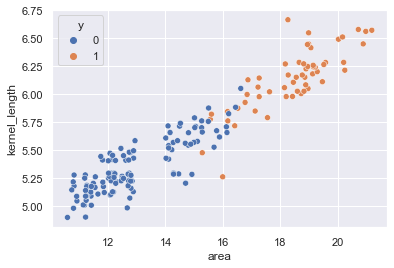

In [9]:
sns.scatterplot(x='area',y='kernel_length',hue='y',data=df_train)

### 8. [1 pt] Looking at this graph, if we were to set up a logistic regression with y as our response variable and area and kernel_length as our explanatory variables, would we expect there to exist a threshold that has BOTH a sensitivity rate of 100% and a specificity rate of 100% in the training dataset? Why or why not?

It is not possible to have a line that perfectly separates the blue points and the orange points because some blue and orange points ovelaps (some high blue points and some low orange points). Therefore, there is always missclassification because of these ovelaping points. Thus, there is no threshold that make both the sensitivity rate and specificity 100%.

### 9. [1 pt] Now, set up this logistic regression model (with just the training data) in which 'rosa' is the response variable and the following are the explanatory variables.
* area
* perimeter

Print out the summary below.

In [10]:
mod_train=smf.logit('y ~ area+perimeter',data=df_train).fit()
mod_train.summary()

Optimization terminated successfully.
         Current function value: 0.089548
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:                          Logit   Df Residuals:                      175
Method:                           MLE   Df Model:                            2
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.8562
Time:                        19:33:44   Log-Likelihood:                -15.940
converged:                       True   LL-Null:                       -110.85
Covariance Type:            nonrobust   LLR p-value:                 6.056e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -71.0742     32.453     -2.190      0.029    -134.682      -7.467
area           0.9476      1.808      0.524      0.600      -2.596       4.491
perimeter      3.6889      3.824      0.965      0.335      -3.806      11.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.48 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 10 [1 pt] Next, predict the predictive probabilities for each of the explanatory variable values in your test dataset. Save these predictions in a new column in this test dataset dataframe.

In [11]:
phat = mod_train.predict(exog=df_test[['area','perimeter']])


In [12]:
df_test['predictive_prop']=phat
df_test.head()

<ipython-input-12-18f335bbf0a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predictive_prop']=phat


,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length,seed_class,rosa,y,predictive_prop
153,11.18,12.04,0.8266,5.220,2.692,2.222,5.001,canadian,not_rosa,0,1.053747e-07
74,16.82,15.51,0.8786,6.017,2.486,4.004,5.841,rosa,rosa,1,8.888520e-01
59,12.11,12.47,0.8292,5.159,2.022,1.502,4.519,kama,not_rosa,0,1.242635e-06
172,11.27,12.97,0.8419,5.088,2.762,4.209,5.000,canadian,not_rosa,0,3.545756e-06
16,12.99,12.82,0.9182,5.119,2.282,5.224,4.781,kama,not_rosa,0,1.040410e-05


### 11. [2 pt] Suppose we want to use a probability threshold of $p_0=0.5$. 

That is, if the predictive probability of an observation is at least 0.5, we will classify it as a 1, and otherwise we will classify it as a 0. Use this threshold to classify each of observations in your test dataset. Create a new column in your test dataset with these 1/0 classifications.

In [13]:
df_test['y_hat']=1*(df_test['predictive_prop']>=0.5)
df_test.head()

<ipython-input-13-20beca17bf4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_hat']=1*(df_test['predictive_prop']>=0.5)


,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length,seed_class,rosa,y,predictive_prop,y_hat
153,11.18,12.04,0.8266,5.220,2.692,2.222,5.001,canadian,not_rosa,0,1.053747e-07,0
74,16.82,15.51,0.8786,6.017,2.486,4.004,5.841,rosa,rosa,1,8.888520e-01,1
59,12.11,12.47,0.8292,5.159,2.022,1.502,4.519,kama,not_rosa,0,1.242635e-06,0
172,11.27,12.97,0.8419,5.088,2.762,4.209,5.000,canadian,not_rosa,0,3.545756e-06,0
16,12.99,12.82,0.9182,5.119,2.282,5.224,4.781,kama,not_rosa,0,1.040410e-05,0


### 12. [0.5 pt] Print out the row in your test dataframe that corresponds to the seed with row index 37.

(Note we need to use the **YOUR_TEST_DATAFRAME.loc[37,:]** function instead of the **YOUR_TEST_DATAFRAME.iloc[37,:]** function as the indices of this dataframe do not align with the actual order that they are listed in the dataframe.)

In [14]:
df_test.loc[37,:]

area                        17.08
perimeter                   15.28
compactness                0.9079
kernel_length               5.822
width                       2.682
asymmetry_coefficient       2.956
kernel_groove_length        5.484
seed_class                   kama
rosa                     not_rosa
y                               0
predictive_prop          0.814116
y_hat                           1
Name: 37, dtype: object

### 13. [1 pt] Which of the following would you classify this seed (with index 37) as:
a.) a true positive,
b.) a true negative,
c.) a false positive, or
d.) a false negative?
Explain.

this seed's classification is false positive because it is above the threshold and $y\neq \hat{y}$

### 14. [1 pt] Create a confusion matrix for your test dataset with this threshold.

In [15]:
confusion_matrix(y_true=df_test['y'], y_pred=df_test['y_hat'])


array([[16,  2],
       [ 2, 12]], dtype=int64)

In [16]:
tn, fp, fn, tp = confusion_matrix(y_true=df_test['y'], 
                                  y_pred=df_test['y_hat']).ravel()
(tn, fp, fn, tp)

(16, 2, 2, 12)

### 15. [1 pt] How many false positives are there in your training dataset with this threshold? How many false negatives are there?

There are 2 false positive and 2 false negative in the training dataset with this threshold

### 16. [1 pt] What is the sensitivity of the test dataset with this threshold of $p_0=0.5$?

In [17]:
print('sensitivity: ', (tp/(fn+tp)))

sensitivity:  0.8571428571428571


### 17. [1 pt]  What is the specificity of the test dataset with this threshold of $p_0=0.5$?

In [18]:
print('specificity: ', (tn/(fp+tn)))

specificity:  0.8888888888888888


### [1 pt]  What is the true positive rate of the test dataset with this threshold of $p_0=0.5$?

In [19]:
#Sensitivity=true positive rate
print('True positive rate: ', (tp/(tp+fn)))

True positive rate:  0.8571428571428571


### [1 pt]  What is the false positive rate of the test dataset with this threshold of $p_0=0.5$?

In [20]:
#false positive rate= 1 - specification
print('false positive rate: ', (fp/(fp+tn)))

false positive rate:  0.1111111111111111


### [2 pt]  Create a ROC curve for this logistic regression model with the test dataset.

In [21]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
fprs, tprs, thresholds = roc_curve(y_true=df_test['y'], y_score=phat)
auc = roc_auc_score(y_true=df_test['y'], y_score=phat)
print('AUC: ',auc)

AUC:  0.9801587301587301


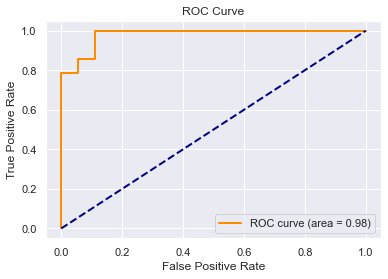

In [23]:
plot_roc(fprs, tprs, auc)

### [2 pt]  What is the AUC of this ROC curve? Is this good?

auc=0.98, which is really close to 1. Therefore, this model is really good.

### [2 pt]  Suppose you work for a seed classification company that is highly desires a high true positive rate in when trying to detect rosa seeds and would ideally like to have a low false positive rate as well. What probability threshold should your company use?

In [24]:
print('fprs :')
print(fprs)
print('tprs: ')
print(tprs)
print('p Thresholds')
p_thresholds=np.exp(thresholds)/(1+np.exp(thresholds))
print(np.round(p_thresholds,2))

fprs :
[0.         0.         0.         0.05555556 0.05555556 0.11111111
 0.11111111 1.        ]
tprs: 
[0.         0.07142857 0.78571429 0.78571429 0.85714286 0.85714286
 1.         1.        ]
p Thresholds
[0.88 0.73 0.71 0.69 0.64 0.63 0.54 0.5 ]


With p-threshold=0.54, the true positive rate is as high as 1 and the false positive rate is as low as 0.11. Thus, the company should use this probability threshold.